In [3]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns  
from sklearn.model_selection import train_test_split

In [61]:
train, test = tf.keras.datasets.mnist.load_data() 
X = np.concatenate([train[0], test[0]]) 
Y = np.concatenate([train[1], test[1]]) 

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)  
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1)

In [62]:
print('training data x: {}, y: {}'.format(x_train.shape, y_train.shape)) 
print('validation data x: {}, y: {}'.format(x_val.shape, y_val.shape)) 
print('testing data x: {}, y: {}'.format(x_test.shape, y_test.shape))

training data x: (50400, 28, 28), y: (50400,)
validation data x: (5600, 28, 28), y: (5600,)
testing data x: (14000, 28, 28), y: (14000,)


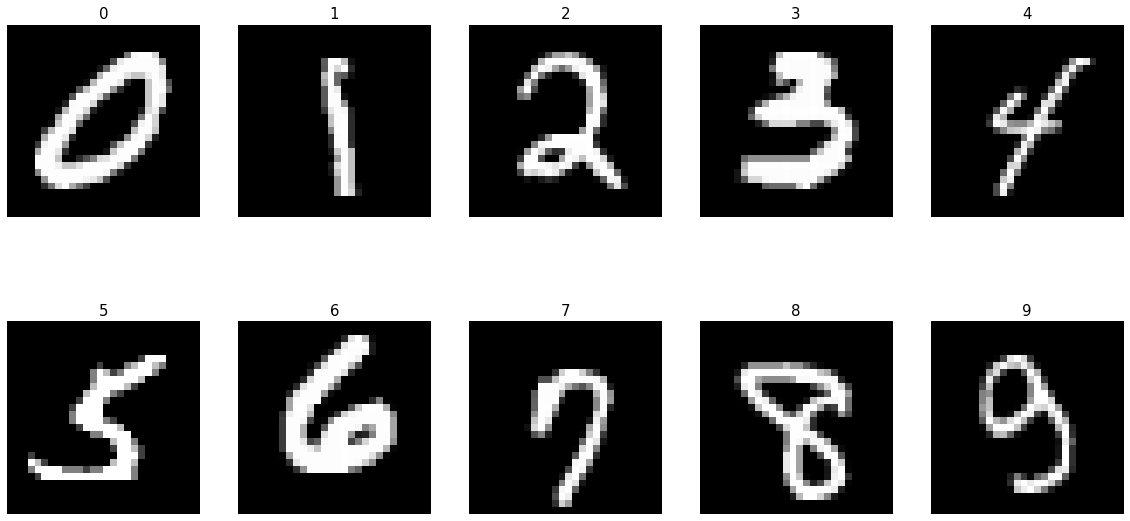

In [64]:
j = 1
fig = plt.figure(figsize=(20, 10))
for i in range(10): 
  fig.add_subplot(2, 5, j) 
  plt.imshow(x_train[y_train == i][0], cmap="gray") 
  plt.title(i, fontsize=15) 
  plt.axis('off') 
  j += 1

In [65]:
def process_input(x, y):
    X = np.array(x)[..., None].astype(np.float32) / 255.
    Y = np.array(y).astype(np.int64)[..., None]
    return x, y

In [66]:
X_train, Y_train = process_input(x_train, y_train) 
X_val, Y_val = process_input(x_val, y_val)

In [67]:
model = tf.keras.models.Sequential([                                
          
          tf.keras.layers.Input(shape=[28, 28, 1]), 
          tf.keras.layers.Conv2D(filters=8, kernel_size=(3, 3), activation="relu", strides=(1, 1), padding='valid'), 
          tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation="relu", strides=(2, 2), padding='valid'), 
          tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu", strides=(1, 1), padding='same'), 
          tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu", strides=(2, 2), padding='valid'),   
          tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation="relu", strides=(1, 1), padding='valid'), 
          tf.keras.layers.Dropout(0.25), 
          tf.keras.layers.Conv2D(filters=10, kernel_size=(3, 3), activation="softmax", strides=(1, 1), padding='valid'),  
          tf.keras.layers.Flatten()
                                   
                                   ]) 
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy']) 
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 8)         80        
                                                                 
 conv2d_13 (Conv2D)          (None, 12, 12, 16)        1168      
                                                                 
 conv2d_14 (Conv2D)          (None, 12, 12, 32)        4640      
                                                                 
 conv2d_15 (Conv2D)          (None, 5, 5, 64)          18496     
                                                                 
 conv2d_16 (Conv2D)          (None, 3, 3, 128)         73856     
                                                                 
 dropout_2 (Dropout)         (None, 3, 3, 128)         0         
                                                                 
 conv2d_17 (Conv2D)          (None, 1, 1, 10)         

In [71]:
batch_size=512 
epochs=20 
history = model.fit(x=X_train, y=Y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, Y_val))

Epoch 1/20
99/99 [==============================] - 30s 302ms/step - loss: 0.0090 - accuracy: 0.9970 - val_loss: 0.0500 - val_accuracy: 0.9904
Epoch 2/20
99/99 [==============================] - 29s 292ms/step - loss: 0.0054 - accuracy: 0.9980 - val_loss: 0.0491 - val_accuracy: 0.9895
Epoch 3/20
99/99 [==============================] - 29s 290ms/step - loss: 0.0067 - accuracy: 0.9977 - val_loss: 0.0482 - val_accuracy: 0.9895
Epoch 4/20
99/99 [==============================] - 29s 290ms/step - loss: 0.0059 - accuracy: 0.9980 - val_loss: 0.0504 - val_accuracy: 0.9900
Epoch 5/20
99/99 [==============================] - 29s 290ms/step - loss: 0.0062 - accuracy: 0.9979 - val_loss: 0.0560 - val_accuracy: 0.9891
Epoch 6/20
99/99 [==============================] - 29s 290ms/step - loss: 0.0052 - accuracy: 0.9980 - val_loss: 0.0564 - val_accuracy: 0.9893
Epoch 7/20
99/99 [==============================] - 29s 291ms/step - loss: 0.0054 - accuracy: 0.9979 - val_loss: 0.0578 - val_accuracy: 0.9882

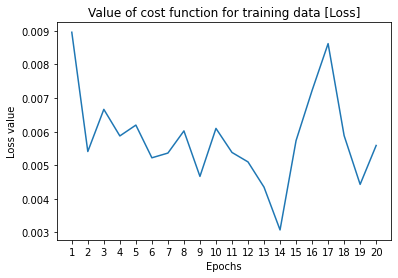

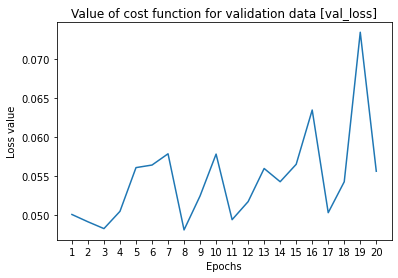

In [90]:
plt.figure(1) 
plt.plot(np.arange(1, epochs+1), history.history['loss']) 
plt.xticks(np.arange(1, epochs+1))  
plt.title('Value of cost function for training data [Loss]') 
plt.xlabel('Epochs') 
plt.ylabel('Loss value')
plt.show()
plt.figure(2) 
plt.plot(np.arange(1, epochs+1), history.history['val_loss']) 
plt.xticks(np.arange(1, epochs+1))  
plt.title('Value of cost function for validation data [val_loss]') 
plt.xlabel('Epochs') 
plt.ylabel('Loss value')
plt.show()

In [92]:
loss, acc = model.evaluate(x_test, y_test) 
print('Loss: {}, Accuracy: {}'.format(loss, acc))

438/438 [==============================] - 4s 10ms/step - loss: 0.0487 - accuracy: 0.9903
Loss: 0.04869109392166138, Accuracy: 0.9902856945991516


In [116]:
y_pred = model.predict(x_test) 
y_pred_classes = np.argmax(y_pred, axis=1) 

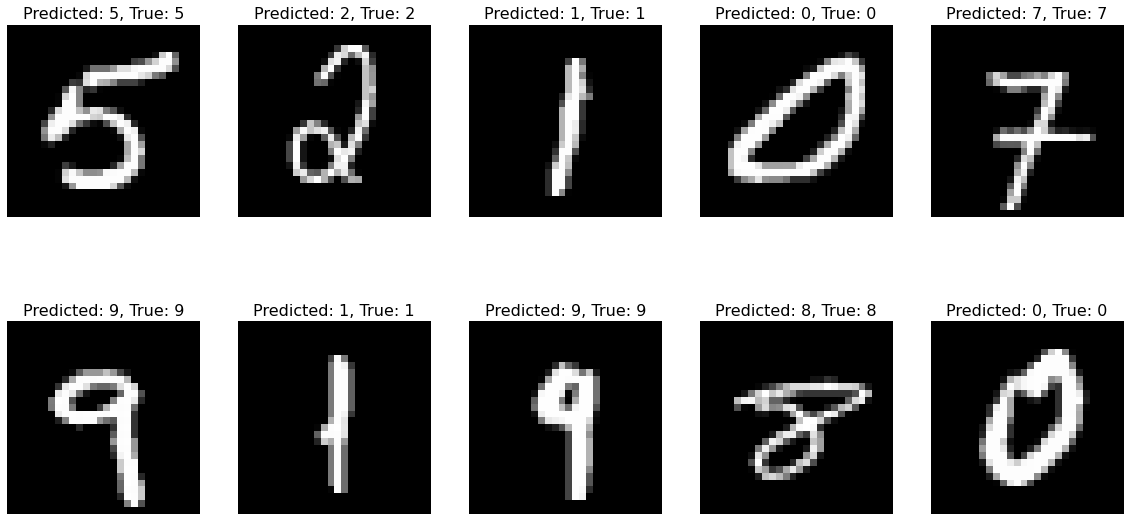

In [117]:
fig = plt.figure(figsize=(20, 10))
for i in range(10): 
  fig.add_subplot(2, 5, i+1)  
  random = np.random.choice(len(x_test))
  x_sample = x_test[random] 
  y_true_sample = y_test[random] 
  y_pred_sample = y_pred_classes[random] 
  plt.title("Predicted: {}, True: {}".format(y_pred_sample, y_true_sample), fontsize=16)  
  plt.imshow(x_sample.reshape(28, 28), cmap='gray')
  plt.axis('off')  

In [119]:
y_pred = model.predict(x_test) 
y_pred_classes = np.argmax(y_pred, axis=1) 


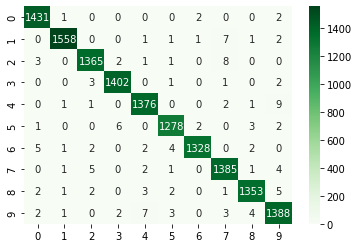

In [122]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, y_pred_classes)  
sns.heatmap(cm, annot=True, fmt='d', cmap="Greens")

In [124]:
print(y_test) 
print(y_pred_classes)

[6 8 3 ... 9 9 7]
[6 8 3 ... 9 9 7]


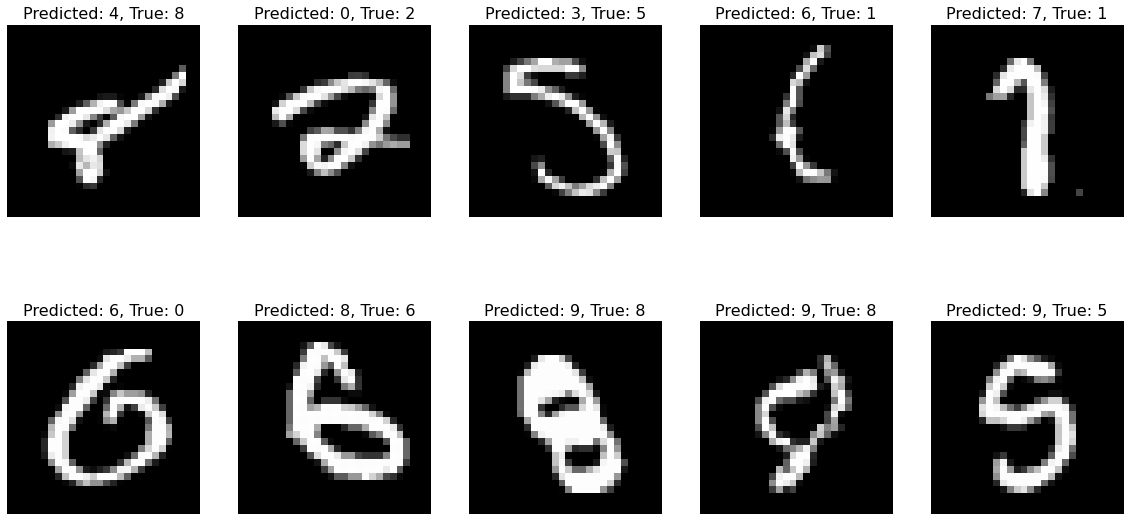

In [149]:
incorrect_predictions = [] 
incorrect_image = []
for i in range(len(y_pred_classes)): 
  if y_test[i] != y_pred_classes[i]: 
    incorrect_predictions.append((y_test[i], y_pred_classes[i])) 
    incorrect_image.append(x_test[i])

fig2 = plt.figure(figsize=(20, 10))
for i in range(10): 
  fig2.add_subplot(2, 5, i+1)  
  random_2 = np.random.choice(len(incorrect_image)) 
  x_sample_incorrect = incorrect_image[random_2]   
  y_false_sample = incorrect_predictions[random_2][0] 
  y_pred_false_sample = incorrect_predictions[random_2][1] 
  plt.title("Predicted: {}, True: {}".format(y_pred_false_sample, y_false_sample), fontsize=16)  
  plt.imshow(x_sample_incorrect.reshape(28, 28), cmap='gray')
  plt.axis('off')  